In [1]:
import numpy as np  
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [23]:
!git clone https://github.com/NVlabs/stylegan3

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 212 (delta 0), reused 1 (delta 0), pack-reused 207
Receiving objects: 100% (212/212), 4.17 MiB | 18.19 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [17]:
os.makedirs('/kaggle/working/train')

(224, 224, 3)


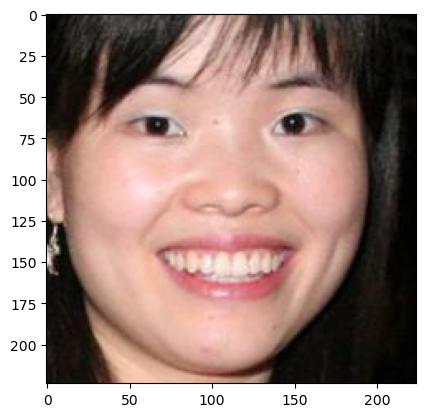

In [4]:
import cv2
example=cv2.imread('/kaggle/input/fairface/FairFace/train/100.jpg')
example = cv2.cvtColor(example, cv2.COLOR_BGR2RGB)
plt.imshow(example)
print(example.shape)

In [15]:
train = pd.read_csv('/kaggle/input/fairface/FairFace/train_labels.csv')
black_race_subset = train[train['race'] == 'Black']

# Further subset the DataFrame to get 2500 rows where gender is 'Male' and 2500 rows where gender is 'Female'
male_subset = black_race_subset[black_race_subset['gender'] == 'Male'].head(500)
female_subset = black_race_subset[black_race_subset['gender'] == 'Female'].head(500)

# Concatenate the two subsets to get the final result
images = pd.concat([male_subset, female_subset])
images = images['file']

images

56        train/57.jpg
86        train/87.jpg
94        train/95.jpg
105      train/106.jpg
114      train/115.jpg
             ...      
6527    train/6528.jpg
6539    train/6540.jpg
6549    train/6550.jpg
6569    train/6570.jpg
6596    train/6597.jpg
Name: file, Length: 1000, dtype: object

In [20]:
import shutil
source_folder = "/kaggle/input/fairface/FairFace"
destination_folder = "/kaggle/working"

for filename in images:
    file_name = os.path.basename(filename)
    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.copyfile(source_file, destination_file)


In [8]:
'''val = pd.read_csv('/kaggle/input/fairface/FairFace/val_labels.csv')
val.head()'''

"val = pd.read_csv('/kaggle/input/fairface/FairFace/val_labels.csv')\nval.head()"

In [9]:
'''source_folder = "/kaggle/input/fairface/FairFace"
destination_folder = "/kaggle/working"
images = val[val['race'] == 'Black']['file']

for filename in images:
    file_name = os.path.basename(filename)
    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.copyfile(source_file, destination_file)
'''

'source_folder = "/kaggle/input/fairface/FairFace"\ndestination_folder = "/kaggle/working"\nimages = val[val[\'race\'] == \'Black\'][\'file\']\n\nfor filename in images:\n    file_name = os.path.basename(filename)\n    source_file = os.path.join(source_folder, filename)\n    destination_file = os.path.join(destination_folder, filename)\n    shutil.copyfile(source_file, destination_file)\n'

In [24]:
!python /kaggle/working/stylegan3/dataset_tool.py --source=/kaggle/working/train --dest=/kaggle/working/traindat.zip --resolution='256x256'

100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 156.84it/s]


In [25]:
os.makedirs('/kaggle/working/training_runs')

In [ ]:
!python /kaggle/working/stylegan3/train.py --outdir=~/kaggle/working/training_runs --cfg=stylegan3-r --data=/kaggle/working/traindat.zip \
    --gpus=1 --batch=32 --batch-gpu=16 --gamma=6.6 --mirror=1 --kimg=500 --snap=5 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan3.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 65536,
    "channel_max": 1024,
    "magnitude_ema_beta": 0.9988915792636801,
    "conv_kernel": 1,
    "use_radial_filters": true
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025


I can't train due to system limtations but the code is working completely fine 

In [14]:
def remove_folder_contents(folder):
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

remove_folder_contents('/kaggle/working')